<a href="https://colab.research.google.com/github/ishaangupta2311/ClickSafe/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle datasets download -d shashwatwork/web-page-phishing-detection-dataset

  0% 0.00/1.01M [00:00<?, ?B/s]
100% 1.01M/1.01M [00:00<00:00, 76.5MB/s]


In [ ]:
!unzip web-page-phishing-detection-dataset.zip

Archive:  web-page-phishing-detection-dataset.zip
  inflating: dataset_phishing.csv    


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv("dataset_phishing.csv")

In [ ]:
data

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


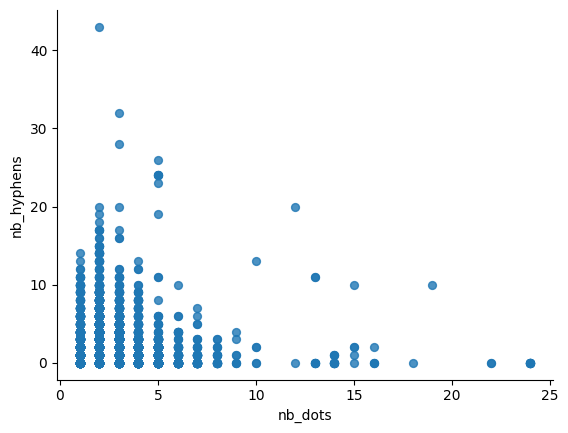

In [ ]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='nb_dots', y='nb_hyphens', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

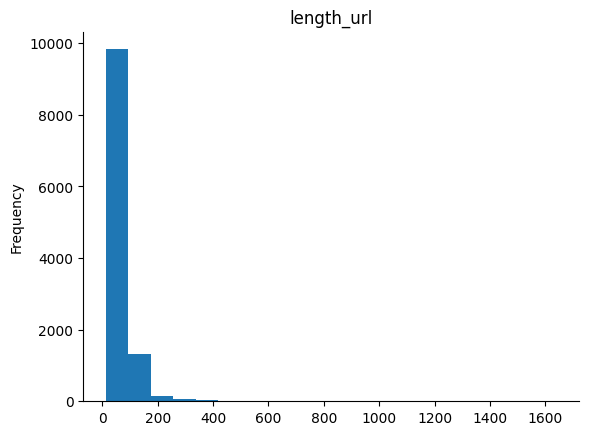

In [ ]:
from matplotlib import pyplot as plt
data['length_url'].plot(kind='hist', bins=20, title='length_url')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [ ]:
data.status.value_counts()

legitimate    5715
phishing      5715
Name: status, dtype: int64

In [ ]:
ds1 = data.copy()

In [ ]:
ds1.status.replace({'legitimate': 0,
                     'phishing':1},
                    inplace=True)

In [ ]:
ds1.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


In [ ]:
ds1.drop('url',axis=1, inplace = True)
ds1

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,0
11426,84,18,0,5,0,1,1,0,0,1,...,1,0,0,211,6728,0,0,1,0,1
11427,105,16,1,2,6,0,1,0,0,1,...,0,0,0,2809,8515,8,0,1,10,0
11428,38,30,0,2,0,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,0


In [ ]:
X = ds1.drop(['status'],axis=1)
y = ds1.status

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(random_state=1)
clf1.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
from sklearn.metrics import accuracy_score
clf1_preds = clf1.predict(x_test)
accuracy_score(y_test,clf1_preds)

0.963254593175853

In [ ]:
clf1.feature_importances_.max()

0.17883770434116628

In [ ]:
clf1.feature_importances_.shape

(87,)

<Axes: >

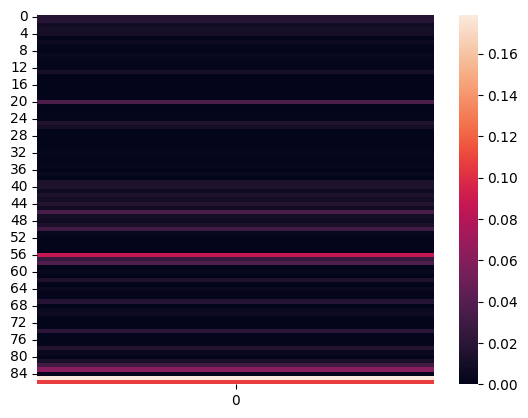

In [ ]:
sns.heatmap(clf1.feature_importances_.reshape(-1,1))

In [ ]:
0.025/2

0.0125

In [ ]:
clf1.feature_importances_

array([1.80113764e-02, 1.83720134e-02, 7.89608394e-03, 1.08662345e-02,
       9.80643311e-03, 4.79159443e-04, 5.65694256e-03, 1.58759659e-03,
       0.00000000e+00, 4.17857964e-03, 2.53885153e-03, 7.16277560e-05,
       1.85652353e-03, 1.08849295e-02, 0.00000000e+00, 5.82589813e-04,
       7.32469790e-05, 4.06517001e-04, 0.00000000e+00, 1.19591684e-03,
       3.57634246e-02, 8.85709900e-04, 1.95156662e-04, 8.80188536e-04,
       1.90722585e-03, 1.60543569e-02, 1.03048422e-02, 5.96811799e-06,
       1.88305016e-04, 6.73450240e-04, 4.21657132e-04, 4.43944703e-04,
       3.47906165e-03, 1.94959744e-03, 8.62446839e-04, 2.31079488e-03,
       2.66778530e-05, 3.57859758e-03, 0.00000000e+00, 1.35983732e-02,
       1.43213185e-02, 6.79611442e-03, 1.33733910e-02, 9.75271750e-03,
       1.69348552e-02, 7.53203711e-03, 3.45899825e-02, 9.80637137e-03,
       8.10716768e-03, 1.35062702e-02, 3.05123982e-02, 3.40277131e-03,
       5.91936079e-05, 2.70266291e-04, 1.15684791e-03, 9.53133853e-04,
      

In [ ]:
len(clf1.feature_importances_[clf1.feature_importances_>0.0125])

22

In [ ]:
low_importance_indices = np.where(clf1.feature_importances_<0.01)[0]
low_importance_feat = [ds1.columns[i] for i in low_importance_indices]
print(len(low_importance_feat))
low_importance_feat.remove("shortening_service")

61


In [ ]:
ds2 = ds1.drop(low_importance_feat,axis =1)
print(ds2.shape)
ds2.head()

(11430, 28)


,length_url,length_hostname,nb_dots,nb_slash,nb_www,ratio_digits_url,ratio_digits_host,shortening_service,length_words_raw,char_repeat,...,ratio_extRedirection,links_in_tags,safe_anchor,domain_in_title,domain_registration_length,domain_age,web_traffic,google_index,page_rank,status
0,37,19,3,3,1,0.000000,0.0,0,4,4,...,0.875000,80.000000,0.0,0,45,-1,0,1,4,0
1,77,23,1,5,0,0.220779,0.0,0,4,4,...,0.000000,100.000000,100.0,1,77,5767,0,1,2,1
2,126,50,4,5,0,0.150794,0.0,0,12,2,...,0.000000,100.000000,100.0,1,14,4004,5828815,1,0,1
3,18,11,2,2,0,0.000000,0.0,0,1,0,...,0.250000,100.000000,62.5,1,62,-1,107721,0,3,0
4,55,15,2,5,1,0.000000,0.0,0,6,3,...,0.537037,76.470588,0.0,0,224,8175,8725,0,6,0


In [ ]:
X2 = ds2.drop("status",axis=1)
y2 = ds2.status
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test = train_test_split(X2,y2, test_size = 0.2,random_state=1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier()
clf2.fit(x2_train,y2_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
clf2_preds = clf2.predict(x2_test)
accuracy_score(y2_test,clf2_preds)

0.9597550306211724

In [ ]:
data.columns

In [ ]:
claude_features = ["length_url",'nb_dots', 'nb_hyphens', 'nb_slash','https_token',
'ratio_digits_url', 'ratio_digits_host','punycode',
'abnormal_subdomain', 'nb_subdomains','shortening_service','nb_redirection',
'nb_external_redirection','domain_in_brand', 'brand_in_subdomain',
'brand_in_path','web_traffic', 'domain_age', 'dns_record', 'google_index',
'page_rank','links_in_tags', 'external_favicon', 'iframe', 'popup_window',
'submit_email', 'safe_anchor', 'onmouseover', 'right_clic',
'domain_in_title', 'domain_with_copyright','status']
len(claude_features)

32

In [ ]:
ds3 = data[claude_features]
ds3.head()

,length_url,nb_dots,nb_hyphens,nb_slash,https_token,ratio_digits_url,ratio_digits_host,punycode,abnormal_subdomain,nb_subdomains,...,external_favicon,iframe,popup_window,submit_email,safe_anchor,onmouseover,right_clic,domain_in_title,domain_with_copyright,status
0,37,3,0,3,1,0.000000,0.0,0,0,3,...,0,0,0,0,0.0,0,0,0,1,legitimate
1,77,1,0,5,1,0.220779,0.0,0,0,1,...,0,0,0,0,100.0,0,0,1,0,phishing
2,126,4,1,5,0,0.150794,0.0,0,0,3,...,0,0,0,0,100.0,0,0,1,0,phishing
3,18,2,0,2,1,0.000000,0.0,0,0,2,...,0,0,0,0,62.5,0,0,1,0,legitimate
4,55,2,2,5,1,0.000000,0.0,0,0,2,...,0,0,0,0,0.0,0,0,0,1,legitimate


In [ ]:
ds3.status.replace({'legitimate': 0,
                     'phishing':1},
                    inplace=True)

<ipython-input-47-350de06e88ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds3.status.replace({'legitimate': 0,


In [ ]:
X3 = ds3.drop("status",axis=1)
y3 = ds3.status
from sklearn.model_selection import train_test_split
x3_train,x3_test,y3_train,y3_test = train_test_split(X3,y3, test_size = 0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators':[10,100,200,500,1000,1200],
        'max_depth': [None,5,10,20,30],
        'max_features':['auto', 'sqrt'],
        'min_samples_split':[2,4,6],
        'min_samples_leaf':[1,2,4]}
clf3 = RandomForestClassifier(n_jobs=4)

np.random.seed(42)
rs_clf = RandomizedSearchCV(estimator=clf3, cv=5,
                            param_distributions=grid,
                            n_iter=10,verbose=2,
                            refit=True,
                            random_state=42)

rs_clf.fit(x3_train,y3_train);
# clf3.fit(x3_train,y3_train)

In [ ]:
from sklearn.metrics import accuracy_score
clf3_preds = rs_clf.predict(x3_test)
accuracy_score(y3_test,clf3_preds)

0.9584426946631671

In [ ]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [ ]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(x3_test)
# Evalutate the predictions
rs_metrics = evaluate_preds(y3_test, rs_y_preds)

Acc:95.84%
Precision:0.96
Recall:0.96
F1:0.96


<Axes: >

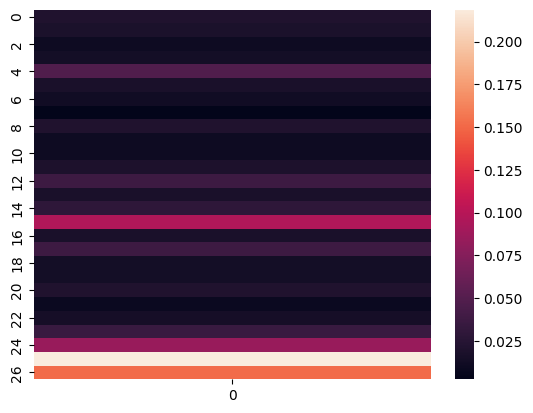

In [ ]:
sns.heatmap(clf2.feature_importances_.reshape(-1,1))

In [ ]:

from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_preds labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)

    metric_dict = {'accuracy': round(accuracy,2),
                   'precision': round(precision,2),
                   'recall': round(recall,2),
                   'f1': round(f1,2)}
    print(f'Acc:{accuracy*100:.2f}%')
    print(f'Precision:{precision:.2f}')
    print(f'Recall:{recall:.2f}')
    print(f'F1:{f1:.2f}')

    return metric_dict

In [ ]:
ds3.head()

,length_url,nb_dots,nb_hyphens,nb_slash,https_token,ratio_digits_url,ratio_digits_host,punycode,abnormal_subdomain,nb_subdomains,...,external_favicon,iframe,popup_window,submit_email,safe_anchor,onmouseover,right_clic,domain_in_title,domain_with_copyright,status
0,37,3,0,3,1,0.000000,0.0,0,0,3,...,0,0,0,0,0.0,0,0,0,1,legitimate
1,77,1,0,5,1,0.220779,0.0,0,0,1,...,0,0,0,0,100.0,0,0,1,0,phishing
2,126,4,1,5,0,0.150794,0.0,0,0,3,...,0,0,0,0,100.0,0,0,1,0,phishing
3,18,2,0,2,1,0.000000,0.0,0,0,2,...,0,0,0,0,62.5,0,0,1,0,legitimate
4,55,2,2,5,1,0.000000,0.0,0,0,2,...,0,0,0,0,0.0,0,0,0,1,legitimate


In [ ]:
ds3.describe()

,length_url,nb_dots,nb_hyphens,nb_slash,https_token,ratio_digits_url,ratio_digits_host,punycode,abnormal_subdomain,nb_subdomains,...,links_in_tags,external_favicon,iframe,popup_window,submit_email,safe_anchor,onmouseover,right_clic,domain_in_title,domain_with_copyright
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.00000,11430.000000,11430.000000
mean,61.126684,2.480752,0.997550,4.289589,0.610936,0.053137,0.025024,0.000350,0.021610,2.231671,...,51.978211,0.442170,0.001312,0.006037,0.0,37.063922,0.001137,0.00140,0.775853,0.439545
std,55.297318,1.369686,2.087087,1.882251,0.487559,0.089363,0.093422,0.018705,0.145412,0.637069,...,41.523144,0.496666,0.036204,0.077465,0.0,39.073385,0.033707,0.03739,0.417038,0.496353
min,12.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
25%,33.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,1.000000,0.000000
50%,47.000000,2.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,60.000000,0.000000,0.000000,0.000000,0.0,23.294574,0.000000,0.00000,1.000000,0.000000
75%,71.000000,3.000000,1.000000,5.000000,1.000000,0.079365,0.000000,0.000000,0.000000,3.000000,...,98.061004,1.000000,0.000000,0.000000,0.0,75.000000,0.000000,0.00000,1.000000,1.000000
max,1641.000000,24.000000,43.000000,33.000000,1.000000,0.723881,0.800000,1.000000,1.000000,3.000000,...,100.000000,1.000000,1.000000,1.000000,0.0,100.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x3_train,y3_train)


LogisticRegression()

In [ ]:
lr_preds = lr.predict(x3_test)
evaluate_preds(y3_test,lr_preds)

Acc:54.46%
Precision:0.62
Recall:0.28
F1:0.39


{'accuracy': 0.54, 'precision': 0.62, 'recall': 0.28, 'f1': 0.39}

In [ ]:
ds4 = ds3.copy()
norm_features = ['length_url','nb_dots','nb_hyphens','nb_slash','links_in_tags']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler([])


In [ ]:
data.status.replace({'legitimate': 0,
                     'phishing':1},
                    inplace=True)

In [ ]:
data.info()

In [ ]:
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num_corr = data_num.corr()['status'][:-1] # -1 means that the latest row is Status
top_features = data_num_corr[abs(data_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with status:\n{}".format(len(top_features), top_features))

There is 2 strongly correlated values with status:
google_index    0.731171
page_rank      -0.511137
Name: status, dtype: float64


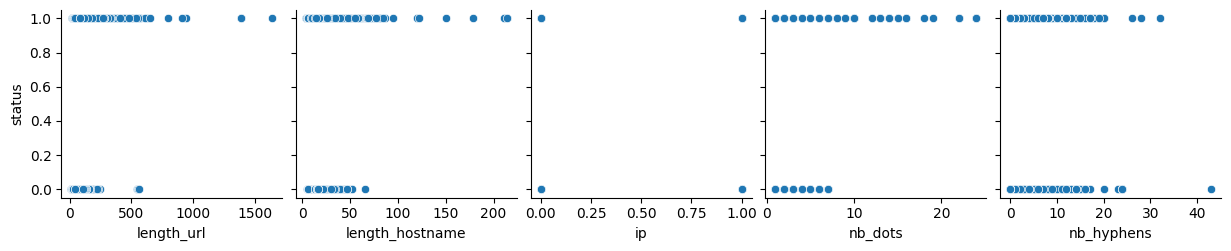

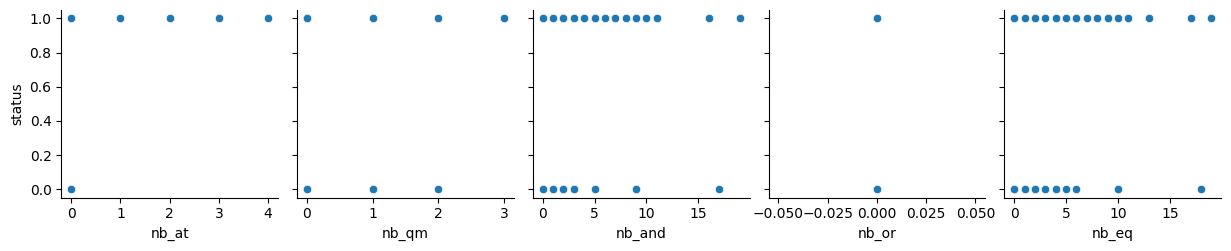

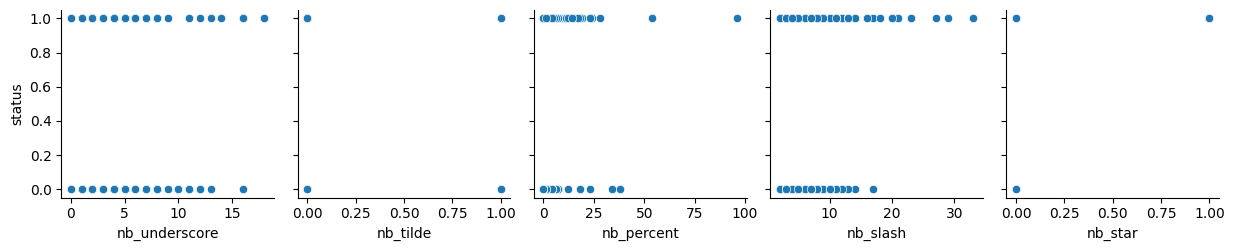

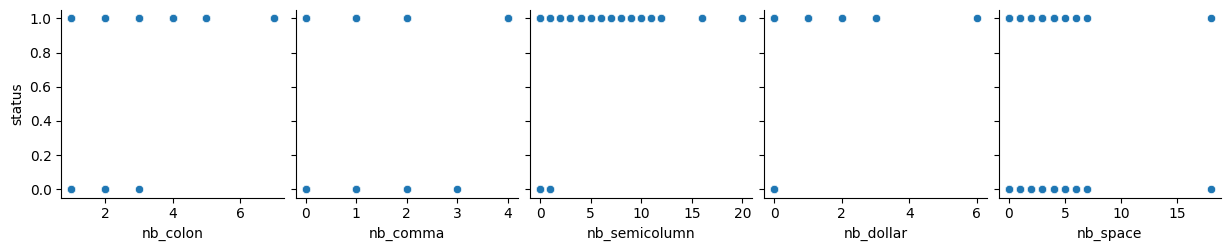

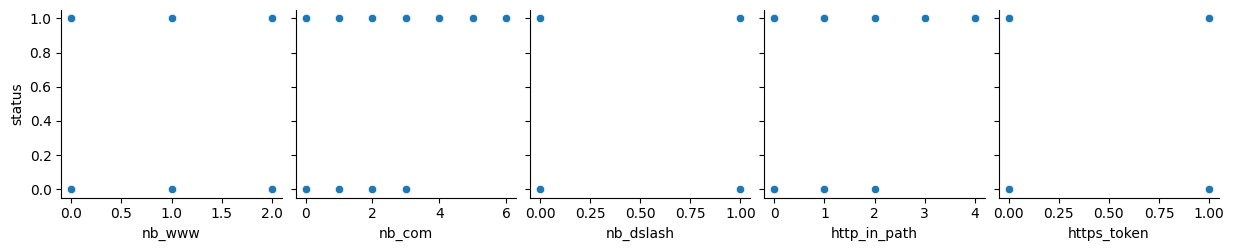

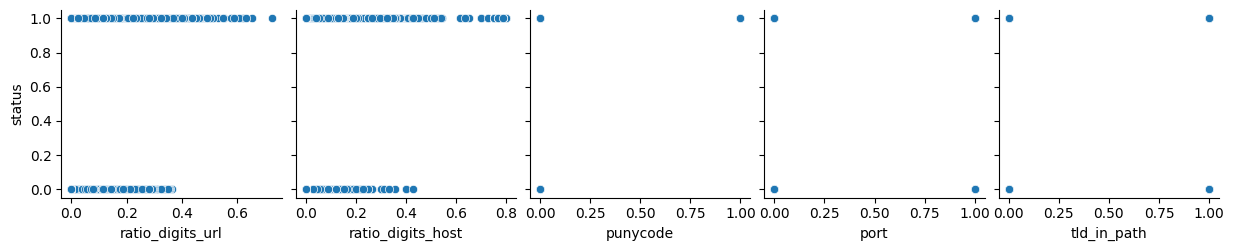

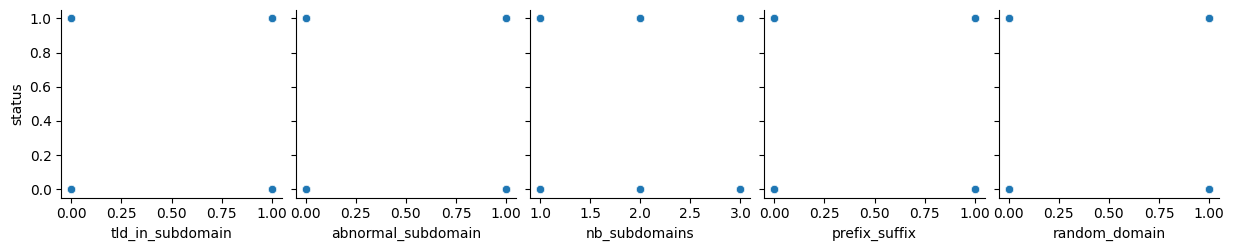

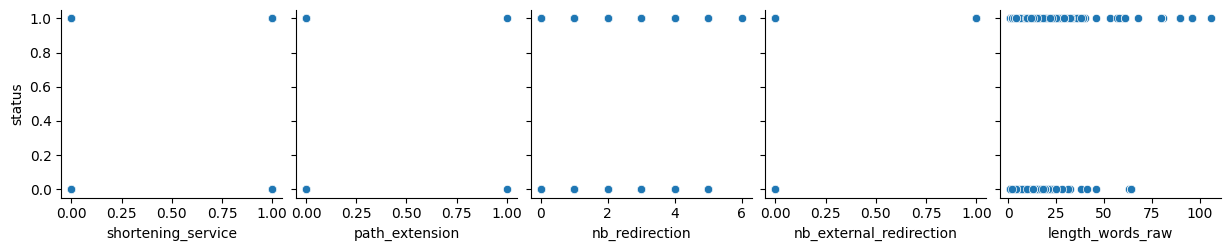

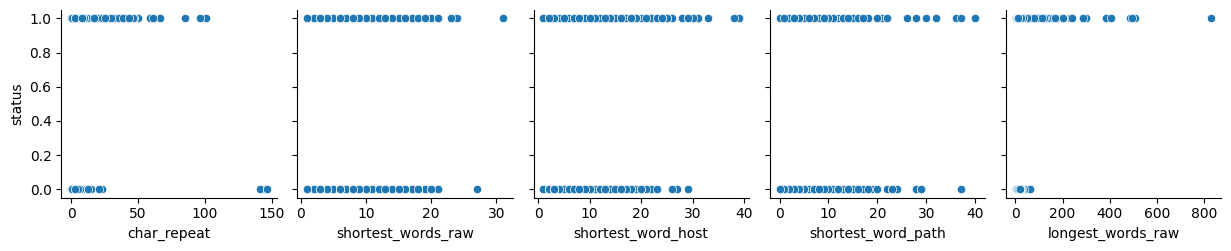

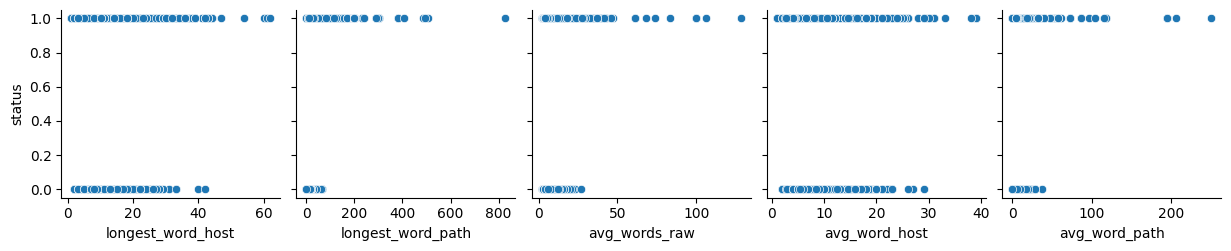

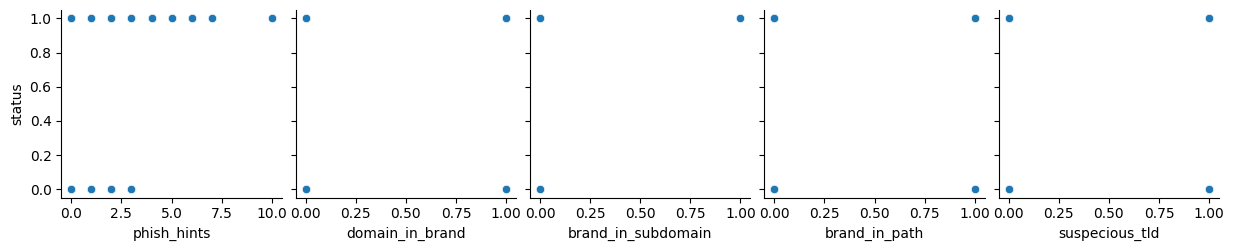

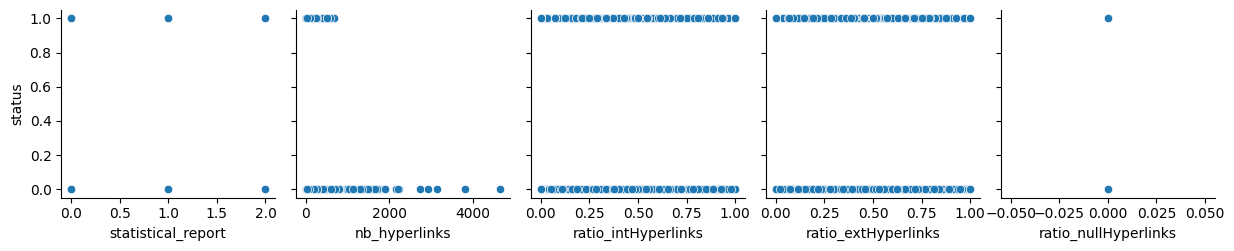

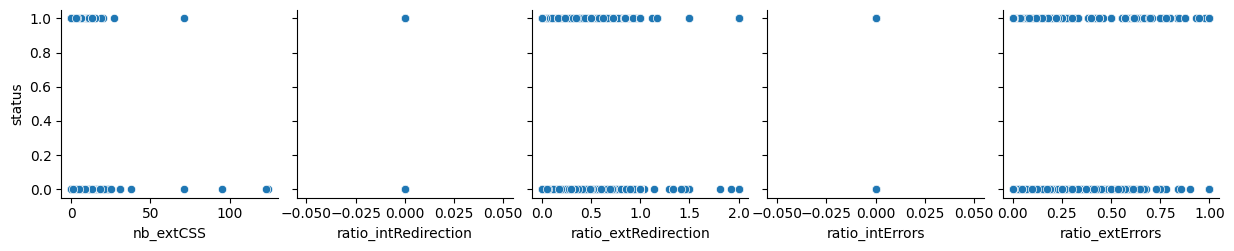

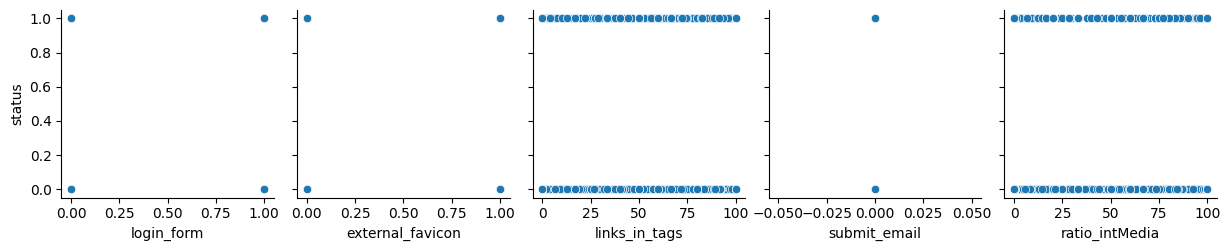

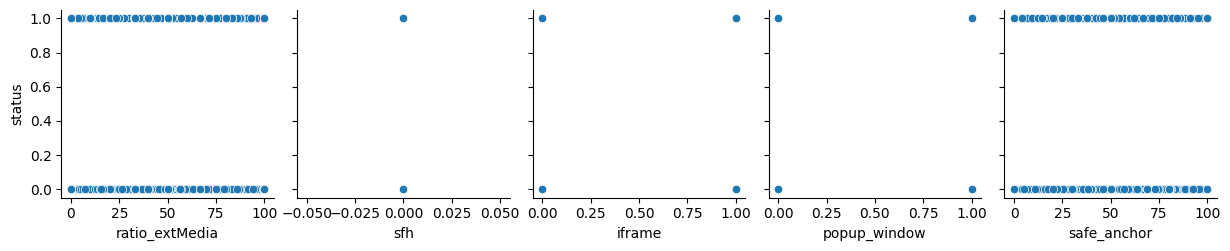

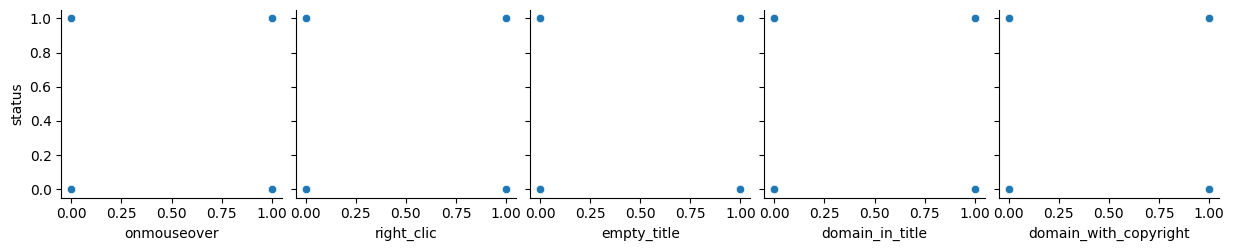

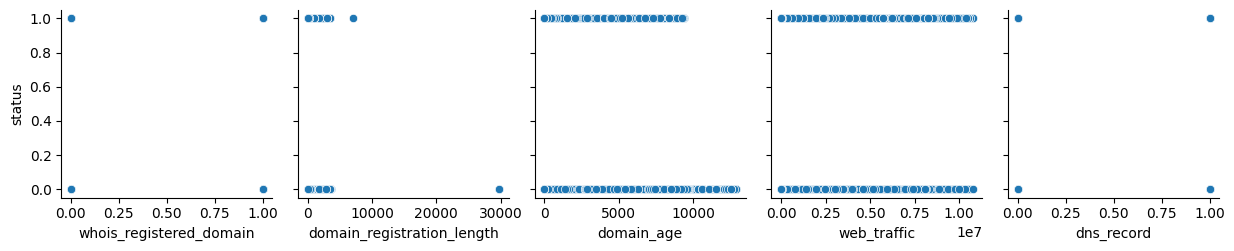

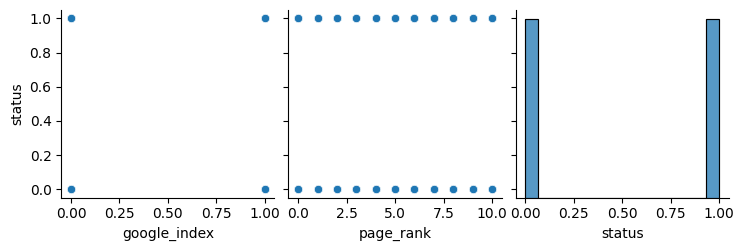

In [76]:
for i in range(0, len(data_num.columns), 5):
    sns.pairplot(data=data_num,
                x_vars=data_num.columns[i:i+5],
                y_vars=['status'])